In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import joblib
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv(r"C:\Users\PRANAVI KAKANI\Downloads\DATASET2.csv\RICE-DATASET.csv")
data.dropna()
data.head()

,Temperature,Humidity,Status
0,22,70,ON
1,20,40,OFF
2,26,35,ON
3,44,44,OFF
4,38,23,OFF


In [3]:
data.shape

(999, 3)

In [4]:
factor = pd.factorize(data['Status'])
data['Status'] = factor[0]
definitions = factor[1]
data.dropna()
print(data.head())
print(definitions)

   Temperature  Humidity  Status
0           22        70       0
1           20        40       1
2           26        35       0
3           44        44       1
4           38        23       1
Index(['ON', 'OFF'], dtype='object')


In [5]:
X = data.iloc[:, 0:2].values
y = data.iloc[:, 2].values

In [6]:
X[:5,:]

array([[22, 70],
       [20, 40],
       [26, 35],
       [44, 44],
       [38, 23]], dtype=int64)

In [7]:
y[:5]

array([0, 1, 0, 1, 1], dtype=int32)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Using Random Forest Classifier

In [10]:
classifier_rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier_rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [11]:
y_pred_rfc = classifier_rfc.predict(X_test)

In [12]:
reversefactor = dict(zip(range(2),definitions))
y_test_labels = np.vectorize(reversefactor.get)(y_test)
y_pred_rfc = np.vectorize(reversefactor.get)(y_pred_rfc)

In [13]:
print(pd.crosstab(y_test_labels, y_pred_rfc, rownames=['True Value'], colnames=['Predicted Value']))

Predicted Value  OFF   ON
True Value               
OFF              101   14
ON                35  100


In [14]:
confusion_matrix(y_test_labels, y_pred_rfc)

array([[101,  14],
       [ 35, 100]], dtype=int64)

# Using Logistic Regression


In [15]:
classifier_log = LogisticRegression()
classifier_log.fit(X_train, y_train)

LogisticRegression()

In [16]:
y_pred_log = classifier_log.predict(X_test)

In [17]:
y_pred_log = np.vectorize(reversefactor.get)(y_pred_log)

In [18]:
confusion_matrix(y_test_labels, y_pred_log)

array([[ 95,  20],
       [ 34, 101]], dtype=int64)

In [19]:
print(pd.crosstab(y_test_labels, y_pred_log, rownames=['True Value'], colnames=['Predicted Value']))

Predicted Value  OFF   ON
True Value               
OFF               95   20
ON                34  101


In [20]:
87/125

0.696

# Using KNN Classifier

In [21]:
classifier_knn = KNeighborsClassifier(n_neighbors = 4)
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [22]:
y_pred_knn = classifier_knn.predict(X_test)

In [23]:
y_pred_knn = np.vectorize(reversefactor.get)(y_pred_knn)

In [24]:
confusion_matrix(y_test_labels, y_pred_knn)

array([[ 87,  28],
       [ 18, 117]], dtype=int64)

In [25]:
print(pd.crosstab(y_test_labels, y_pred_knn, rownames=['True Value'], colnames=['Predicted Value']))

Predicted Value  OFF   ON
True Value               
OFF               87   28
ON                18  117


In [26]:
99/125

0.792

# ROC Analysis

In [27]:
from sklearn.metrics import roc_curve


pred_prob1 = classifier_log.predict_proba(X_test)
pred_prob2 = classifier_rfc.predict_proba(X_test)
pred_prob3 = classifier_knn.predict_proba(X_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)



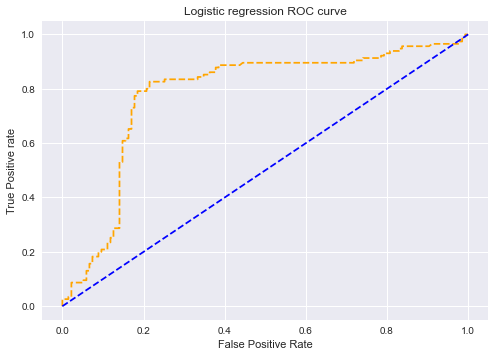

In [37]:
# plot for logistic regression roc curve
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue', label = 'No Skill')
plt.title('Logistic regression ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.show();

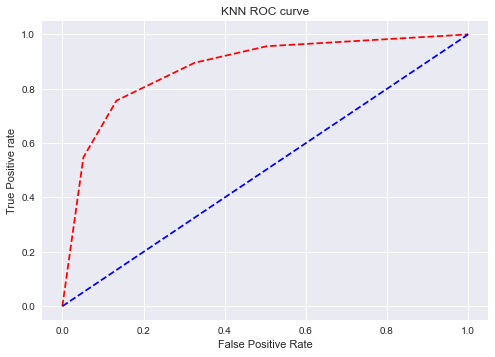

In [38]:
# plot for knn roc curve
plt.plot(fpr3, tpr3,linestyle='--',color='red', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue', label = 'No Skill')
plt.title('KNN ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.show();

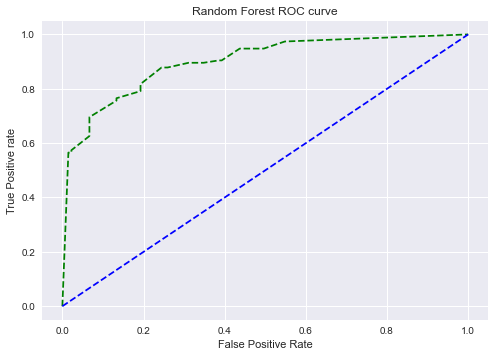

In [36]:
# plot for random forest roc curve
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='RFC')
plt.plot(p_fpr, p_tpr, linestyle='--',color='blue', label = 'No Skill')
plt.title('Random Forest ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.show();

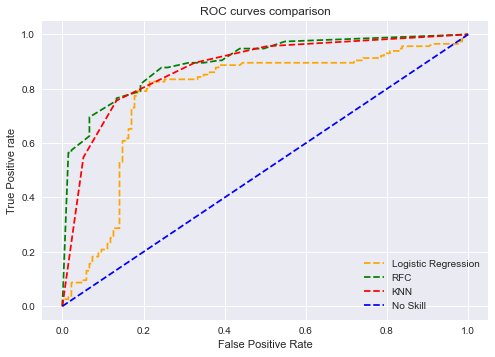

In [39]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--', color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='RFC')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue', label = 'No Skill')
# title
plt.title('ROC curves comparison')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='lower right')
plt.savefig(r'C:\Users\PRANAVI KAKANI\Downloads\ROC',dpi=300)
plt.show();

In [29]:
from sklearn.metrics import roc_auc_score

print("ROC score of Logistic Regression: ",roc_auc_score(y_test, pred_prob1[:, 1]))
print("ROC score of Random Forest Classifier: ",roc_auc_score(y_test, pred_prob2[:, 1]))
print("ROC score of KNN: ", roc_auc_score(y_test, pred_prob3[:, 1]))

ROC score of Logistic Regression:  0.7811272141706924
ROC score of Random Forest Classifier:  0.8988405797101449
ROC score of KNN:  0.8765861513687601


# Conclusion

Random forest classifier model is the optimum algrorithm for our this project. This can be derived according to the above calculated ROC scores.